# EDA Titanic

Este cuaderno reproduce paso a paso el Análisis Exploratorio de Datos (EDA) del dataset **Titanic**, siguiendo la misma estructura que los apuntes.

📂 **Requisito previo**: asegúrate de tener el archivo `titanic.csv` en el mismo directorio del notebook o súbelo en Colab.

## 0. Importación de librerías y carga del dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Conocer el dataset

En esta sección revisamos la estructura del dataset:

- Columnas disponibles
- Tipos de datos
- Primeras filas
- Valores nulos y duplicados

In [4]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
# Resumen estadístico de las variables numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**Conclusiones iniciales:**

- Vemos cuántas filas y columnas tiene el dataset.
- Identificamos columnas numéricas y categóricas.

In [6]:
# Valores nulos por columna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [7]:
# Filas duplicadas
df.duplicated().sum()

np.int64(0)

**Conclusiones sobre nulos y duplicados:**

- `Age`, `Cabin`, `Fare` y `Embarked` tienen valores nulos que será necesario tratar en preprocesamiento.
- `Cabin` tiene tantos valores nulos que no va a ser una columna útil.
- No hay filas duplicadas de las que debamos ocuparnos más tarde.

### Valores únicos en variables categóricas

In [9]:
# Categorías en 'Embarked'
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# Sexo
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [11]:
# Clase del pasajero
df["Pclass"].unique()

array([3, 1, 2])

In [12]:
# Cabina
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
# Ticket
df["Ticket"].unique()[:10]  # mostramos solo los 10 primeros para no saturar la salida

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

In [17]:
# Nombre
df["Name"].unique()[:10]  # mostramos solo los 10 primeros para no saturar la salida

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

**Conclusión:**  
Vemos qué categorías existen y si hay valores nulos o extraños. Esto nos ayuda a detectar posibles errores o categorías poco frecuentes.

En general, todas las categorías tienen valores reducidos.

El `Name`, `Cabin` y `Ticket` son variables textuales (muchos valores diferentes) y no parece que vayan a aportar mucho al modelo. Tu nombre no define tu supervivencia ni el número de Ticket.

## 2. Análisis univariante

En el análisis univariante estudiamos una variable a la vez para entender su distribución y posibles problemas.

### 2.1 Variables numéricas — `Age`

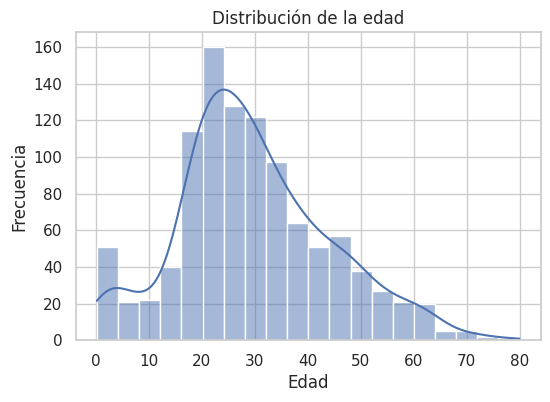

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"].dropna(), bins=20, kde=True)

plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.show()

**Conclusiones:**

- La mayoría de pasajeros tienen entre ~20 y 40 años.
- Hay menos pasajeros en edades muy altas.
- La presencia de huecos y la cola hacia la derecha indica cierta asimetría y posibles outliers.

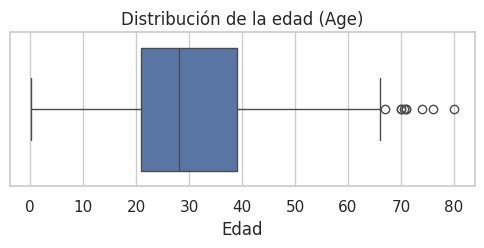

In [21]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df["Age"])
plt.title("Distribución de la edad (Age)")
plt.xlabel("Edad")
plt.show()

**Conclusiones:**

* La mayoría de pasajeros tienen entre 20 y 40 años.
* Algunos valores altos (personas mayores) aparecen como outliers, pero son válidos por contexto ya que las edades son realistas (80 años).

### 2.2 Variables numéricas — `Fare`

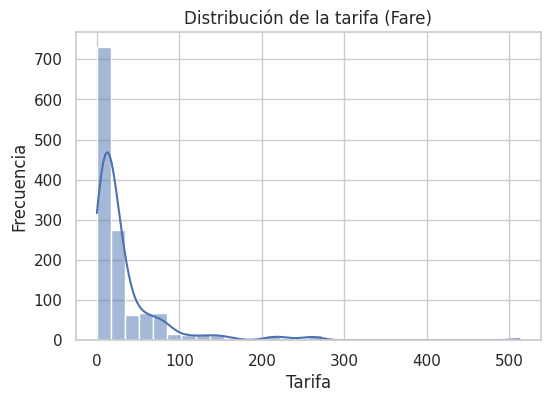

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Fare"].dropna(), bins=30, kde=True)
plt.title("Distribución de la tarifa (Fare)")
plt.xlabel("Tarifa")
plt.ylabel("Frecuencia")
plt.show()

**Conclusiones:**

* La mayoría de tarifas están concentradas en valores bajos.
* Hay una cola larga hacia la derecha (sesgo positivo).
* Existen tarifas muy altas (posibles outliers).

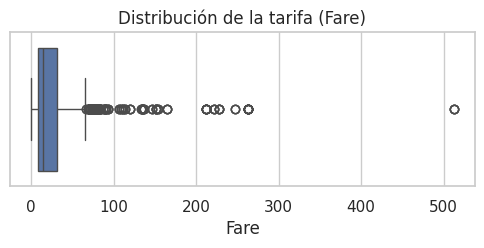

In [22]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df["Fare"])
plt.title("Distribución de la tarifa (Fare)")
plt.xlabel("Fare")
plt.show()

**Conclusiones:**

- La mayoría de tarifas se concentran en valores bajos.
- Existen valores muy altos (puntos alejados) que podrían ser *outliers*.
- Para decidir cómo tratarlos, habrá que analizar el contexto y abordarlo en preprocesamiento.
- En Titanic había diferentes clases (Pclass). Hubo gente que pagó mucho para subir, son valores reales.

### 2.3 Variables categóricas — Countplot de `Sex`

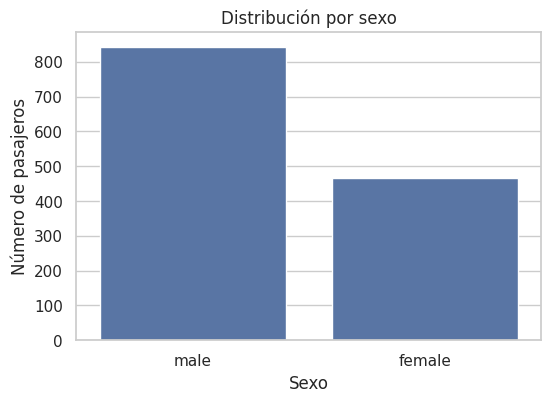

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=df)
plt.title("Distribución por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusiones:**

- Hay más pasajeros hombres que mujeres.
- Esta diferencia puede influir en la supervivencia y se analizará en el análisis bivariante.

### 2.4 Variables categóricas — Countplot de `Survived`

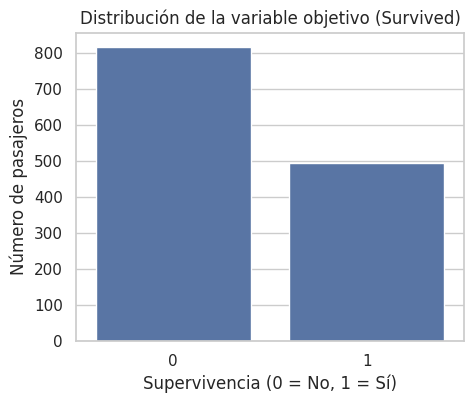

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x="Survived", data=df)
plt.title("Distribución de la variable objetivo (Survived)")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusión:**
* La clase Survived = 0 (no sobrevivió) es más frecuente.
* El dataset está algo desbalanceado, lo que puede influir en el entrenamiento del modelo.

### 2.5 Variables categóricas — Countplot de `Pclass`

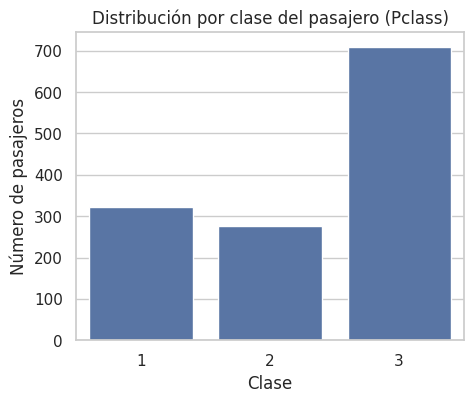

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x="Pclass", data=df)
plt.title("Distribución por clase del pasajero (Pclass)")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusión:**

* La mayoría de pasajeros viajaban en tercera clase, seguidos por segunda y primera.
* La clase del billete probablemente esté relacionada con la supervivencia (nivel socioeconómico).

### 2.6 Variables categóricas — Countplot de `Embarked`

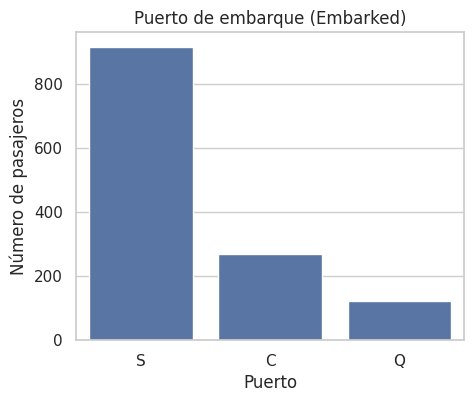

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x="Embarked", data=df)
plt.title("Puerto de embarque (Embarked)")
plt.xlabel("Puerto")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusión:**

* La mayoría embarcó en Southampton (S), seguido de Cherbourg (C) y Queenstown (Q).
* Puede tener relación con el tipo de pasajero o clase social.

### 2.7 Variables categóricas — Countplot de `SibSp`

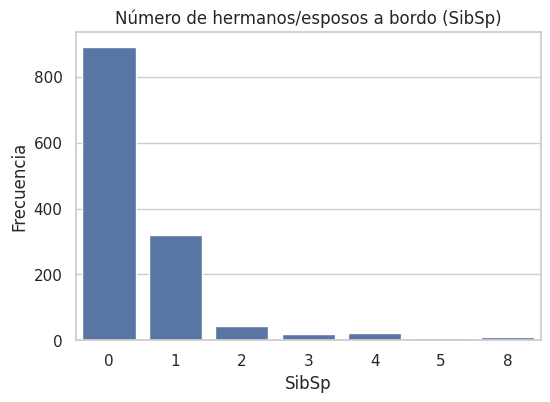

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="SibSp", data=df)
plt.title("Número de hermanos/esposos a bordo (SibSp)")
plt.xlabel("SibSp")
plt.ylabel("Frecuencia")
plt.show()

**Conclusión:**

* La mayoría de pasajeros viajaban solos o con un solo familiar (SibSp = 0 o 1).
* Valores más altos son poco frecuentes y podrían analizarse como outliers.

### 2.8 Variables categóricas — Countplot de `Parch`

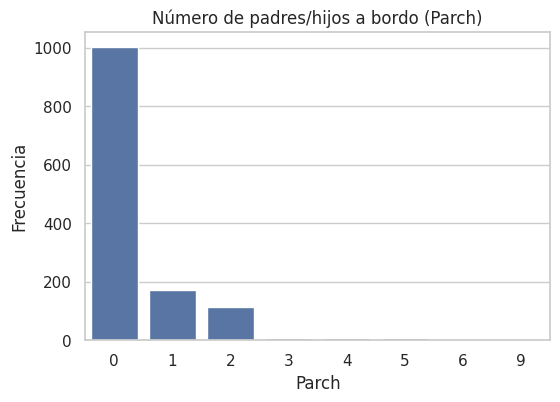

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="Parch", data=df)
plt.title("Número de padres/hijos a bordo (Parch)")
plt.xlabel("Parch")
plt.ylabel("Frecuencia")
plt.show()

**Conclusión:**

* La mayoría de pasajeros viajaban sin familiares directos (Parch = 0).
* Algunos viajaban con hijos o padres, pero son menos comunes.

## 3. Análisis bivariante

Ahora estudiamos relaciones entre dos variables, especialmente entre las variables explicativas y la variable objetivo `Survived`.

### 3.1 Categórica ↔ Categórica — `Sex` vs `Survived`

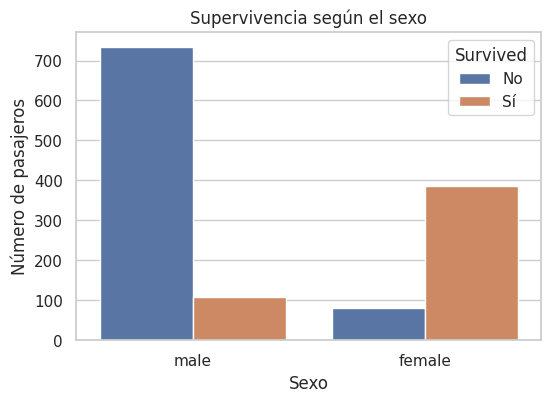

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Supervivencia según el sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pasajeros")
plt.legend(title="Survived", labels=["No", "Sí"])
plt.show()

**Conclusiones:**

- Las mujeres sobreviven en mayor proporción que los hombres.
- `Sex` parece una variable muy relevante para el modelo.

### 3.2 Numérica ↔ Categórica — Grupos de edad vs supervivencia

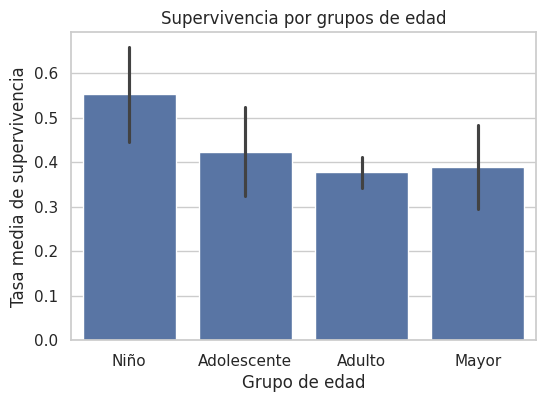

In [32]:
# Crear grupos de edad
df["Age_bin"] = pd.cut(df["Age"], bins=[0, 12, 18, 50, 100],
                       labels=["Niño", "Adolescente", "Adulto", "Mayor"])

plt.figure(figsize=(6,4))
sns.barplot(x="Age_bin", y="Survived", data=df)
plt.title("Supervivencia por grupos de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Tasa media de supervivencia")
plt.show()

**Conclusiones:**

- Los niños tienen una mayor tasa de supervivencia.
- La probabilidad de supervivencia disminuye en los grupos de mayor edad.
- Demuestra que la edad es una variable relevante.

### 3.3 Categórica ↔ Categórica — Pclass vs supervivencia

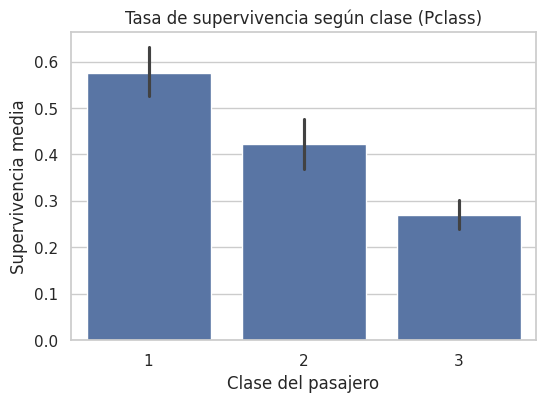

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Tasa de supervivencia según clase (Pclass)")
plt.xlabel("Clase del pasajero")
plt.ylabel("Supervivencia media")
plt.show()

**Conclusión:**

* Los pasajeros de primera clase tienen una tasa de supervivencia mucho mayor que los de tercera clase.
* La clase social es una variable muy importante para el modelo.

### 3.4 Categórica ↔ Categórica — Embarked vs supervivencia

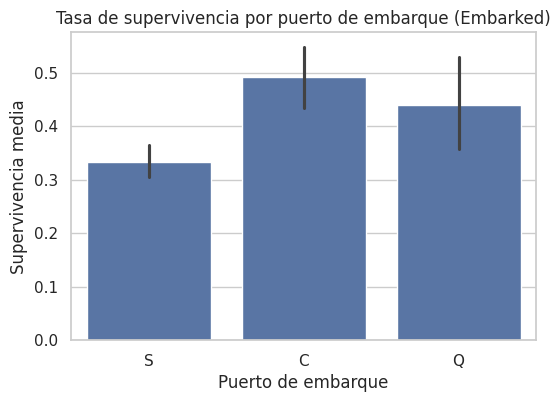

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Tasa de supervivencia por puerto de embarque (Embarked)")
plt.xlabel("Puerto de embarque")
plt.ylabel("Supervivencia media")
plt.show()

**Conclusión:**

* Los pasajeros que embarcaron en Cherbourg (C) presentan mayor tasa de supervivencia, mientras que los que embarcaron en Southampton (S) tienen menor probabilidad.
* Esto podría estar relacionado con la clase del billete o el nivel económico.

### 3.5 Categórica ↔ Categórica — SibSp vs supervivencia

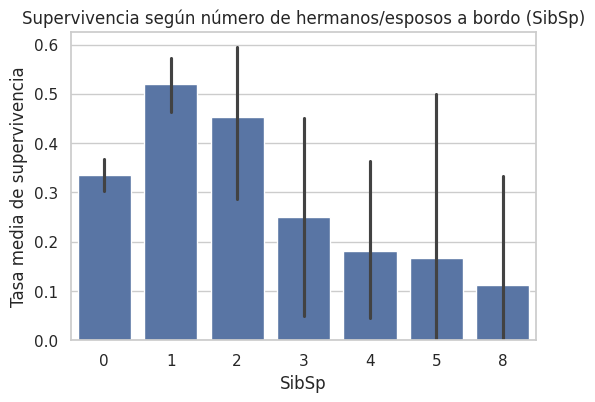

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Supervivencia según número de hermanos/esposos a bordo (SibSp)")
plt.xlabel("SibSp")
plt.ylabel("Tasa media de supervivencia")
plt.show()

**Conclusión:**

* Los pasajeros que viajaban solos (SibSp = 0) o con pocas personas tenían menos probabilidad de sobrevivir que aquellos que viajaban con 1 o 2 familiares.
* A partir de cierto número, la supervivencia vuelve a bajar (viajar en grupos grandes no ayudó).

### 3.6 Categórica ↔ Categórica — Parch vs supervivencia

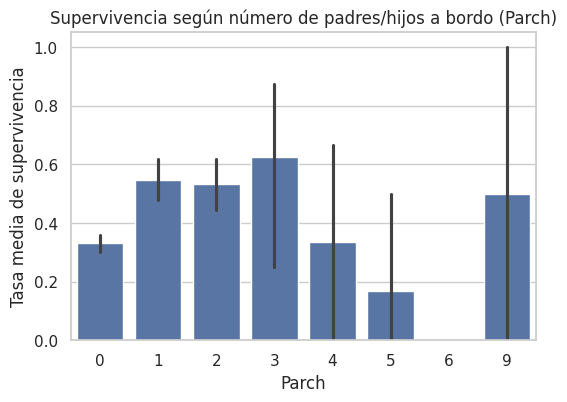

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Supervivencia según número de padres/hijos a bordo (Parch)")
plt.xlabel("Parch")
plt.ylabel("Tasa media de supervivencia")
plt.show()

**Conclusión:**

* Los pasajeros con 1 o 2 familiares directos (Parch = 1 o 2) tenían más posibilidades de sobrevivir que aquellos sin familia a bordo.
* Valores muy altos de Parch se asocian con menor supervivencia

### 3.7 Numérica ↔ Categórica — Fare vs supervivencia

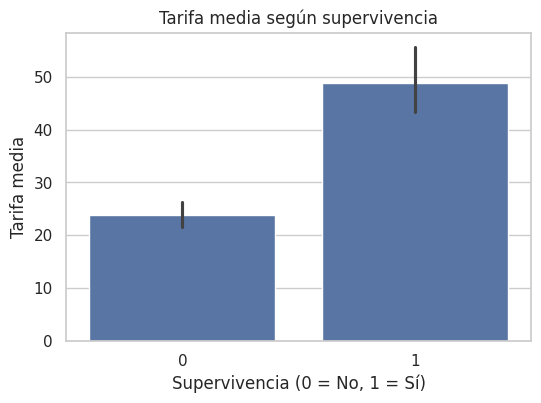

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x="Survived", y="Fare", data=df)
plt.title("Tarifa media según supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Tarifa media")
plt.show()

**Conclusión:**

* La barra correspondiente a Survived = 1 (pasajeros que sobrevivieron) es claramente más alta.
* Esto indica que los pasajeros que pagaron tarifas más altas tenían mayor probabilidad de sobrevivir.
* Confirma la relación entre nivel socioeconómico y supervivencia.

## 4. Análisis multivariante — Matriz de correlación

Analizamos ahora cómo se relacionan entre sí las variables numéricas mediante la **matriz de correlación**.

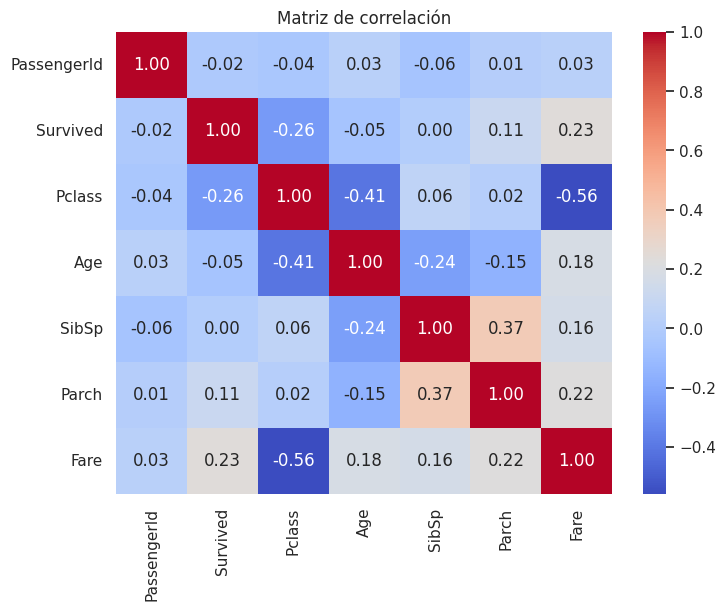

In [40]:
# Matriz de correlación solo con variables numéricas
corr = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

**Conclusiones:**

- `Pclass` y `Fare` muestran correlación (las clases más altas suelen pagar más).
- `SibSp` y `Parch` están relacionadas y podrían combinarse en una medida de tamaño de familia.
- Analizar la correlación con `Survived` nos ayuda a detectar variables potencialmente relevantes.

## 5. Conclusiones finales del EDA

A partir del EDA del Titanic podemos concluir:

- Existen valores nulos importantes en `Age` que deberán tratarse en preprocesamiento.
- Hay outliers en `Fare` y `Age` que deberemos tratar más adelante.
- Variables como `Sex`, `Pclass`, `Fare` y los grupos de edad muestran relación con la supervivencia.
- Algunas variables numéricas están correlacionadas entre sí, lo que sugiere posibles combinaciones o simplificaciones.

✅ Tras este análisis, el siguiente paso es aplicar **preprocesamiento** para:
- Imputar o eliminar valores nulos.
- Tratar outliers de forma adecuada.
- Codificar variables categóricas.
- Escalar variables numéricas cuando el modelo lo requiera.